In [32]:
import aiohttp, http, asyncio, requests, re, time, os, json, pickle
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import steam_tags_f as stf

In [33]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 16)

In [ ]:
%load_ext autoreload
%autoreload 2 

GETTING THE TAGS AND MULTIPLAYER INFO

In [ ]:
url = "http://api.steampowered.com/ISteamApps/GetAppList/v2/"
token = "1AC3575ADB761319F3EF72D1FA362232"
params = {"key":token}

scode, data = get_url(url, params=params, type = "api")
display(scode)

In [35]:
app_dict = {app['name']: app['appid'] for app in data['applist']['apps']}

In [10]:
top1000 = pd.read_csv('TOP 1000 Games cleaned.csv')

In [36]:
top1000["APP ID"] = 0

In [ ]:
#top1000_2 = stf.add_appid(top1000,app_dict)

In [ ]:
#top1000.to_csv('TOP 1000 Games cleaned AppId.csv', index=False)

In [51]:
#manually entered some app-ids that were not fetched
appid_fix = pd.read_csv('top_1000_games_cleaned_appid_fix.csv')

In [52]:
appid_fix

,Game Title,Steam App ID
0,PUBG: BATTLE...,578080
1,Black Myth: ...,2358720
2,Palworld,1623730
3,Counter-Stri...,730
4,Lost Ark,1599340
...,...,...
995,Winter Memories,2495450
996,Magicraft,2103140
997,Assetto Cors...,805550
998,Timberborn,1062090


In [53]:
txt = pd.read_csv(r"top_1000_games_cleaned_appid_fix.csv")
txt = txt.rename({"Game Title":"title", "Steam App ID":"id"}, axis=1)
appid_list = list(txt["id"])

In [54]:
# Example
appid = 2923300

# Step 1: Make a request to the Steam API
response = requests.get(f"http://store.steampowered.com/api/appdetails?appids={appid}")

# Step 2: Parse the response
game = response.json()

#Step 3: Pretty-print the JSON response for better readability
print(json.dumps(game, indent=4))  # Format with indentation of 4 spaces


{
    "2923300": {
        "success": true,
        "data": {
            "type": "game",
            "name": "Banana",
            "steam_appid": 2923300,
            "required_age": 0,
            "is_free": true,
            "detailed_description": "<p class=\"bb_paragraph\"><strong>About the Game</strong> </p><p class=\"bb_paragraph\">Banana is a clicker Game, in which you click a Banana!</p><p class=\"bb_paragraph\">Get a random banana every 3 hours and grow your collection! </p><p class=\"bb_paragraph\"></p><p class=\"bb_paragraph\">3 hour drop pool chances*: </p><ul class=\"bb_ul\"><li><p class=\"bb_paragraph\"> 54% Normal </p></li><li><p class=\"bb_paragraph\"> 30% Common</p></li><li><p class=\"bb_paragraph\">10% Uncommon</p></li><li><p class=\"bb_paragraph\">4% Rare</p></li><li><p class=\"bb_paragraph\">2% Epic</p></li><li><p class=\"bb_paragraph\"> 1/4 000 000 Ultra Rare </p></li><li><p class=\"bb_paragraph\"> 1/28 000 000 Legendary </p></li></ul><p class=\"bb_paragraph\">* S

In [55]:
genres = game["2923300"]["data"]["genres"]
descriptions = [genre["description"] for genre in genres]
print (descriptions)

['Adventure', 'Casual', 'Simulation', 'Strategy', 'Free To Play']


In [56]:
result = stf.check_multiplayer_single("1599340")
print(result) 

{'1599340': ['Multi-player', 'Co-op']}


In [ ]:
#tag_dict = stf.get_tags(appid_list)

In [57]:
with open ("tag_dict.pkl", "rb") as tag_dict_file:
    tag_dict = pickle.load(tag_dict_file)


In [58]:
tag_dict

{578080: ['Action', 'Adventure', 'Massively Multiplayer', 'Free To Play'],
 2358720: ['Action', 'Adventure', 'RPG'],
 1623730: ['Action', 'Adventure', 'Indie', 'RPG', 'Early Access'],
 730: ['Action', 'Free To Play'],
 1599340: ['Action',
  'Adventure',
  'Massively Multiplayer',
  'RPG',
  'Free To Play'],
 570: ['Action', 'Strategy', 'Free To Play'],
 1091500: ['RPG'],
 1245620: ['Action', 'RPG'],
 2923300: ['Adventure', 'Casual', 'Simulation', 'Strategy', 'Free To Play'],
 1063730: ['Action', 'Adventure', 'Massively Multiplayer', 'RPG'],
 990080: ['Action', 'Adventure', 'RPG'],
 1086940: ['Adventure', 'RPG', 'Strategy'],
 1568590: ['Casual',
  'Indie',
  'Massively Multiplayer',
  'Strategy',
  'Free To Play'],
 1172470: ['Action', 'Adventure', 'Free To Play'],
 892970: ['Action', 'Adventure', 'Indie', 'RPG', 'Early Access'],
 1938090: ['Action'],
 105600: ['Action', 'Adventure', 'Indie', 'RPG'],
 1515950: ['Action', 'Free To Play'],
 377160: ['RPG'],
 532210: ['Adventure'],
 175591

In [59]:
appid_fix["tags"] = 0

#steam_df_tags = stf.add_tags(appid_fix,tag_dict)

In [60]:
with open ("steam_df_tags.pkl", "rb") as steam_df_tags_file:
    steam_df_tags = pickle.load(steam_df_tags_file)

steam_df_tags

,Game Title,Steam App ID,tags
0,PUBG: BATTLE...,578080,"Action, Adve..."
1,Black Myth: ...,2358720,"Action, Adve..."
2,Palworld,1623730,"Action, Adve..."
3,Counter-Stri...,730,"Action, Free..."
4,Lost Ark,1599340,"Action, Adve..."
...,...,...,...
995,Winter Memories,2495450,Not Found
996,Magicraft,2103140,"Action, Adve..."
997,Assetto Cors...,805550,"Racing, Simu..."
998,Timberborn,1062090,"Indie, Simul..."


In [ ]:
#steam_df_tags.to_csv('steam_appid_tags.csv', index=False)

In [61]:
token = "1AC3575ADB761319F3EF72D1FA362232"

In [ ]:
#mp_dict = stf.check_multiplayer(appid_list, token, delay=1)

In [62]:
with open ("mp_dict.pkl", "rb") as mp_dict_file:
    mp_dict = pickle.load(mp_dict_file)

mp_dict

{578080: ['Multi-player'],
 2358720: [],
 1623730: ['Multi-player', 'Co-op'],
 730: ['Multi-player'],
 1599340: ['Multi-player', 'Co-op'],
 570: ['Multi-player', 'Co-op'],
 1091500: [],
 1245620: ['Multi-player', 'Co-op'],
 2923300: [],
 1063730: ['Multi-player', 'Co-op'],
 990080: [],
 1086940: ['Multi-player', 'Co-op'],
 1568590: ['Multi-player', 'Co-op'],
 1172470: ['Multi-player', 'Co-op'],
 892970: ['Multi-player', 'Co-op'],
 1938090: ['Multi-player', 'Co-op'],
 105600: ['Multi-player', 'Co-op'],
 1515950: ['Multi-player', 'Co-op'],
 377160: [],
 532210: [],
 1755910: ['Multi-player', 'Co-op'],
 553850: ['Multi-player', 'Co-op'],
 945360: ['Multi-player', 'Co-op'],
 1326470: ['Multi-player', 'Co-op'],
 232770: [],
 552990: ['Multi-player', 'Co-op'],
 1203220: ['Multi-player'],
 271590: ['Multi-player', 'Co-op'],
 863550: ['Multi-player', 'Co-op'],
 370910: [],
 582010: ['Multi-player', 'Co-op'],
 1716740: [],
 622590: [],
 10: ['Multi-player'],
 1085660: ['Multi-player', 'Co-op'],

In [63]:
steam_df_tags_mp = stf.add_mp(steam_df_tags, mp_dict)

In [64]:
steam_df_tags_mp

,Game Title,Steam App ID,tags
0,PUBG: BATTLE...,578080,"Action, Adve..."
1,Black Myth: ...,2358720,"Action, Adve..."
2,Palworld,1623730,"Action, Adve..."
3,Counter-Stri...,730,"Action, Free..."
4,Lost Ark,1599340,"Action, Adve..."
...,...,...,...
995,Winter Memories,2495450,Not Found
996,Magicraft,2103140,"Action, Adve..."
997,Assetto Cors...,805550,"Racing, Simu..."
998,Timberborn,1062090,"Indie, Simul..."


In [65]:
steam_df_tags_mp.to_csv('steam_appid_tags_mp.csv', index=False)

In [66]:
tags_mp_dict = steam_df_tags_mp.set_index("Steam App ID")["tags"].to_dict()

In [67]:
tags_mp_dict

{578080: 'Action, Adventure, Massively Multiplayer, Free To Play, Multi-player',
 2358720: 'Action, Adventure, RPG',
 1623730: 'Action, Adventure, Indie, RPG, Early Access, Multi-player, Co-op',
 730: 'Action, Free To Play, Multi-player',
 1599340: 'Action, Adventure, Massively Multiplayer, RPG, Free To Play, Multi-player, Co-op',
 570: 'Action, Strategy, Free To Play, Multi-player, Co-op',
 1091500: 'RPG',
 1245620: 'Action, RPG, Multi-player, Co-op',
 2923300: 'Adventure, Casual, Simulation, Strategy, Free To Play',
 1063730: 'Action, Adventure, Massively Multiplayer, RPG, Multi-player, Co-op',
 990080: 'Action, Adventure, RPG',
 1086940: 'Adventure, RPG, Strategy, Multi-player, Co-op',
 1568590: 'Casual, Indie, Massively Multiplayer, Strategy, Free To Play, Multi-player, Co-op',
 1172470: 'Action, Adventure, Free To Play, Multi-player, Co-op',
 892970: 'Action, Adventure, Indie, RPG, Early Access, Multi-player, Co-op',
 1938090: 'Action, Multi-player, Co-op',
 105600: 'Action, Adven

In [ ]:
#with open ("tags_mp_dict.pkl", "wb") as tags_mp_dict_file:
    #pickle.dump(tags_mp_dict, tags_mp_dict_file)

In [68]:
tags_name_dict = steam_df_tags_mp.set_index("Steam App ID")["Game Title"].to_dict()

In [69]:
tags_name_dict[226320]

'Marvel Heroes Omega'

In [70]:
tags_name_dict

{578080: 'PUBG: BATTLEGROUNDS',
 2358720: 'Black Myth: Wukong',
 1623730: 'Palworld',
 730: 'Counter-Strike 2',
 1599340: 'Lost Ark',
 570: 'Dota 2',
 1091500: 'Cyberpunk 2077',
 1245620: 'ELDEN RING',
 2923300: 'Banana',
 1063730: 'New World',
 990080: 'Hogwarts Legacy',
 1086940: "Baldur's Gate 3",
 1568590: 'Goose Goose Duck',
 1172470: 'Apex Legends',
 892970: 'Valheim',
 1938090: 'Call of Duty®',
 105600: 'Terraria',
 1515950: 'Capcom Arcade Stadium',
 377160: 'Fallout 4',
 532210: 'Life is Strange 2',
 1755910: 'Capcom Arcade 2nd Stadium',
 553850: 'HELLDIVERS™ 2',
 945360: 'Among Us',
 1326470: 'Sons Of The Forest',
 232770: 'POSTAL',
 552990: 'World of Warships',
 1203220: 'NARAKA: BLADEPOINT',
 271590: 'Grand Theft Auto V',
 863550: 'HITMAN™ 2',
 370910: 'Kathy Rain',
 582010: 'Monster Hunter: World',
 1716740: 'Starfield',
 622590: 'PUBG: Test Server',
 10: 'Counter-Strike',
 1085660: 'Destiny 2',
 72850: 'The Elder Scrolls V: Skyrim',
 534380: 'Dying Light 2: Reloaded Editio

In [ ]:
#with open ("tags_name_dict.pkl", "wb") as tags_name_dict_file:
   # pickle.dump(tags_name_dict, tags_name_dict_file)

In [ ]:
out3_extracted.head(10)

In [ ]:
#tags_mp_dict

In [ ]:
#for transposing new_df = out3_extracted.T.copy()

new_df = out3_extracted.copy()

In [ ]:
new_df.columns

In [ ]:
new_row = pd.DataFrame(tags_mp_dict, index = [0])

In [ ]:
add row [0]
for col in new_df.columns:
    if col in tags_mp_dict.keys()
        row [0][column] = tags_mp_dict[key]

In [ ]:
# Define a new row of zeroes with the same number of columns as df
zero_row = pd.DataFrame([[0] * len(new_df.columns)], columns=new_df.columns)

# Concatenate the new zero row at index 0
new_df_0 = pd.concat([zero_row, new_df]).reset_index(drop=True)

In [ ]:
new_df_0

In [ ]:
tags_mp_dict

In [ ]:
tags_mp_dict_str = {str(key):value for key, value in tags_mp_dict.items()}

In [ ]:
tags_mp_dict_str

In [ ]:
df2 = add_tags_df(new_df_0, tags_mp_dict_str)
df2.head()

In [ ]:
tags_name_dict

In [ ]:
"""
def add_tags_df (df, dict):
    df2 = df.copy()
    for col in df2.columns:
        int_key = int(col)
        if int_key in map (int, dict.keys()):
            df2.at[0, col] = dict[str(col)]
    return df2
"""        
        

In [ ]:
"""
for col in df2.columns:
        # Convert the integer key to string for comparison
        str_key = str(col)
        if str_key in map(str, tags_mp_dict.keys()):  # Check if the string version of the key exists in dictionary
            df2.at[0, col] = tags_mp_dict[int(col)]  # Use .at to set value by label

    return df2
"""

In [ ]:
df2

FUNCTIONS

In [75]:
def get_url(url, headers=None, params=None, type="ws"):
    """
    Args:
        url (str): pass on url
        type (str): define "ws" (webscrapping) or "api" (for API/json output), default is ws
        headers (str, optional): Defaults to None.
        params (dict, optional): Defaults to None.

    Returns:
        stat , response: outputs stat code and response content, either soup or json type.
    """
    response = requests.get(url,headers=headers, params=params)
    stat = response.status_code
    if type.lower() == "ws":
        soup = BeautifulSoup(response.content, 'html.parser')
    elif type.lower() == "api":
        soup = response.json()
    time.sleep(1)
    
    return stat, soup

def fetch_dict(soup, gameid):
    k_value = 0
    players = soup.find("tbody")
    play = re.split(r"[\n\t]+",players.get_text().strip())
    player_game = {} 

    for i in range(0, len(play), 5):
        # Date
        date = play[i]
        # Peak players
        peak = play[i+1]  
        # Average players
        average = play[i +4]
        player_game[k_value]={"Date": date,
                            "Peak Players":peak,
                            "Avg Players":average,
        }
        
        k_value += 1
        
    return player_game

def overall_fetch(list_id):
    error_list =[]
    game_id_dict = {}
    for gameid in list_id:
        gameid = str(gameid)
        url = f'https://steamcharts.com/app/{gameid}'
        headers= {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36'}
        try:
            stat, soup = get_url(url, headers=headers, params=gameid)
            if stat == 200:
                print(f"Webcode status is : {stat} for {gameid} id. ")
                player_game = fetch_dict(soup, gameid)
                game_id_dict[gameid] = player_game.copy()
            else:
                error_list.append((gameid, stat))
                print(f"Appid: {gameid} reported an error {stat}, skipping it for now")    
        except Exception as e:  # Catch specific exceptions
            error_list.append((gameid, stat))
            print(f"App ID: {gameid} reported an error: {str(e)}, skipping it for now.")
            
    
    return game_id_dict, error_list

def add_tags_df (df, dict):
    df2 = df.copy()
    for col in df2.columns:
        if col in dict.keys():
            df2.at[0, col] = dict[col]
    return df2

MAIN CODES

In [12]:
# creates the games id list
txt = pd.read_csv(r"C:\\Users\\Utilizador\\Desktop\\IRONHACK\\Project 3\\Project-3\\top1k.csv")
txt = txt.rename({"Game Title":"title", "Steam App ID":"id"}, axis=1)
list_id = list(txt["id"])

In [ ]:
## main program, output

game_id_dict, error_list = overall_fetch(list_id)

In [ ]:
# Saves our main source of information into a feather
output = pd.DataFrame.from_dict(game_id_dict)
output.to_feather("output.feather")

In [ ]:
# Saves our error results into an error csv
err_table = pd.DataFrame(error_list)
err_table.to_csv("error.csv")

In [71]:
### Bridges the webscrapping/API part with the cleaning and processing parts

# imports our feather database & gives us an idea of the shape/NaN's present
output = pd.read_feather("C:\\Users\\Utilizador\\Desktop\\IRONHACK\\Project 3\\Project-3\\output.feather")
output.isna().sum()
display(output.shape)

(147, 849)

In [72]:
# Cleans database of most recent games (so from Aug 2019 -> Present)
out2 = output.copy() 
filtered = out2.isna().sum(axis=0) > 85 ## 85 = Aug 2019
filter = filtered[filtered]

mask = list(filter.index)
for code in mask:
    out2.drop(code, axis = 1, inplace=True)

In [79]:
# Converts "Date" into DataFrame index
out3=out2.copy()
out2_extracted = out2.applymap(lambda x: x["Date"] if isinstance(x, dict) else x) 

out3["Date"] = out2_extracted["730"]

# Define a new row of zeroes with the same number of columns as df
zero_row = pd.DataFrame([[0] * len(out3.columns)], columns=out3.columns)

# Concatenate the new zero row at index 0
new_df_0 = pd.concat([zero_row, out3]).reset_index(drop=True)
tags_mp_dict_str = {str(key):value for key, value in tags_mp_dict.items()}

# Adds tag into row 0, also gives the column a name
out3_new = add_tags_df(new_df_0, tags_mp_dict_str)
out3_new["Date"][0] = "Tags"

# Set's date as index
out3_new.set_index('Date', inplace=True)

# filters the table for the data we want
out3_extracted = out3_new.applymap(lambda x: x["Avg Players"] if isinstance(x, dict) else x)

display(out3_extracted)

,578080,730,570,105600,377160,532210,945360,232770,552990,271590,863550,370910,582010,10,72850,...,261570,20920,102500,928600,258970,728880,224600,209650,324800,446800,67370,113200,226320,544920,805550
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tags,"Action, Adve...","Action, Free...","Action, Stra...","Action, Adve...",RPG,Adventure,"Casual, Mult...",Not Found,"Action, Mass...","Action, Adve...","Action, Mult...","Adventure, I...","Action, Mult...","Action, Mult...",RPG,...,Action,RPG,"Action, RPG",Not Found,"Action, Adve...","Action, Casu...","Action, Free...","Action, Mult...","Action, Adve...",Simulation,"Action, Co-op","Action, Adve...",Not Found,"Action, Free...","Racing, Simu..."
Last 30 Days,807515,1473144,726385,41618,28436,561,10881,43,16956,185555,465,13,69267,15985,2890,...,950,894,49,139,81,9870,4,107,283,240,49,394,5,23,5131
August 2024,719506,1425958,734381,40217,34798,561,10069,52,11547,184785,495,7,69267,14878,2936,...,276,953,53,122,83,9870,3,105,1050,223,49,368,4,21,4825
July 2024,700235,1342171,801126,45909,37963,1166,10133,58,10814,185504,448,14,66465,18909,2684,...,385,1078,57,139,168,10530,5,110,417,199,56,337,4,19,5738
June 2024,699256,1510840,869492,47813,80807,531,9699,51,15742,171685,441,8,106017,15671,2804,...,776,892,69,161,145,11857,4,118,699,230,56,346,5,21,6575
May 2024,693105,1614925,943059,42890,167779,390,7772,55,75380,152030,411,12,88495,15664,3038,...,848,873,51,151,72,8431,4,117,284,250,44,335,5,21,7650
April 2024,699697,1618685,921133,51130,186746,292,9052,57,12690,169535,496,10,104895,14470,3120,...,1126,1015,64,166,80,11480,5,146,834,233,48,424,4,17,12290
March 2024,764034,1521796,729865,50825,25580,406,8569,54,11840,193834,461,8,116935,15954,3499,...,1399,898,65,189,119,11990,4,97,471,274,82,444,3,21,6069
February 2024,609366,1347519,741290,41641,24354,2094,8987,51,15103,185992,479,19,100370,14925,3737,...,995,1074,66,122,146,11103,3,109,424,293,164,394,6,21,7183


In [88]:
# Converts columns into game's name
out4 = out3_extracted.copy()
# creates the id list
txt2 = txt.rename({"Game Title":"title", "Steam App ID":"id"}, axis=1)
txt2 = txt2[["id","title"]]
txt2.set_index("id", inplace=True)

# Create a mapping from ids to titles
title_mapping = {str(k): v for k, v in txt2["title"].to_dict().items()}

# Rename the columns in out4 using the mapping
out4.columns = [title_mapping.get(str(col), col) for col in out4.columns]

# Creates our main dataframe visualization 
visual = "Peak Players"
out4 = out4.applymap(lambda x: x[visual] if isinstance(x, dict) else x)
out4[1:] = round(out4[1:].fillna(0).astype(float),0).astype(int)
out4

,PUBG: BATTLEGROUNDS,Counter-Strike 2,Dota 2,Terraria,Fallout 4,Life is Strange 2,Among Us,POSTAL,World of Warships,Grand Theft Auto V,HITMAN™ 2,Kathy Rain,Monster Hunter: World,Counter-Strike,The Elder Scrolls V: Skyrim,...,Ori and the Blind Forest,The Witcher 2: Assassins of Kings Enhanced Edition,Kingdoms of Amalur: Reckoning™,F1 2019,Gauntlet™,Overcooked! 2,Defiance,Call of Duty: Advanced Warfare,Shadow Warrior 2,Transport Fever,The Darkness II,The Binding of Isaac,Marvel Heroes Omega,Darwin Project,Assetto Corsa Competizione
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tags,"Action, Adve...","Action, Free...","Action, Stra...","Action, Adve...",RPG,Adventure,"Casual, Mult...",Not Found,"Action, Mass...","Action, Adve...","Action, Mult...","Adventure, I...","Action, Mult...","Action, Mult...",RPG,...,Action,RPG,"Action, RPG",Not Found,"Action, Adve...","Action, Casu...","Action, Free...","Action, Mult...","Action, Adve...",Simulation,"Action, Co-op","Action, Adve...",Not Found,"Action, Free...","Racing, Simu..."
Last 30 Days,807515,1473144,726385,41618,28436,561,10881,43,16956,185555,465,13,69267,15985,2890,...,950,894,49,139,81,9870,4,107,283,240,49,394,5,23,5131
August 2024,719506,1425958,734381,40217,34798,561,10069,52,11547,184785,495,7,69267,14878,2936,...,276,953,53,122,83,9870,3,105,1050,223,49,368,4,21,4825
July 2024,700235,1342171,801126,45909,37963,1166,10133,58,10814,185504,448,14,66465,18909,2684,...,385,1078,57,139,168,10530,5,110,417,199,56,337,4,19,5738
June 2024,699256,1510840,869492,47813,80807,531,9699,51,15742,171685,441,8,106017,15671,2804,...,776,892,69,161,145,11857,4,118,699,230,56,346,5,21,6575
May 2024,693105,1614925,943059,42890,167779,390,7772,55,75380,152030,411,12,88495,15664,3038,...,848,873,51,151,72,8431,4,117,284,250,44,335,5,21,7650
April 2024,699697,1618685,921133,51130,186746,292,9052,57,12690,169535,496,10,104895,14470,3120,...,1126,1015,64,166,80,11480,5,146,834,233,48,424,4,17,12290
March 2024,764034,1521796,729865,50825,25580,406,8569,54,11840,193834,461,8,116935,15954,3499,...,1399,898,65,189,119,11990,4,97,471,274,82,444,3,21,6069
February 2024,609366,1347519,741290,41641,24354,2094,8987,51,15103,185992,479,19,100370,14925,3737,...,995,1074,66,122,146,11103,3,109,424,293,164,394,6,21,7183


In [91]:
# More cleaning while looking at data. Disregarding outliers etc..
out5 = out4.copy()

## Drops useless games that make weird spikes
out5.drop("POSTAL", axis=1, inplace=True)

# Creates a new column (Total) and concats into the existing dataframe
total_column = out5.sum(axis = 1)
out5 = pd.concat([out5, total_column.rename("Total")], axis=1)

out5

,PUBG: BATTLEGROUNDS,Counter-Strike 2,Dota 2,Terraria,Fallout 4,Life is Strange 2,Among Us,World of Warships,Grand Theft Auto V,HITMAN™ 2,Kathy Rain,Monster Hunter: World,Counter-Strike,The Elder Scrolls V: Skyrim,Last Epoch,...,The Witcher 2: Assassins of Kings Enhanced Edition,Kingdoms of Amalur: Reckoning™,F1 2019,Gauntlet™,Overcooked! 2,Defiance,Call of Duty: Advanced Warfare,Shadow Warrior 2,Transport Fever,The Darkness II,The Binding of Isaac,Marvel Heroes Omega,Darwin Project,Assetto Corsa Competizione,Total
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tags,"Action, Adve...","Action, Free...","Action, Stra...","Action, Adve...",RPG,Adventure,"Casual, Mult...","Action, Mass...","Action, Adve...","Action, Mult...","Adventure, I...","Action, Mult...","Action, Mult...",RPG,"Action, Adve...",...,RPG,"Action, RPG",Not Found,"Action, Adve...","Action, Casu...","Action, Free...","Action, Mult...","Action, Adve...",Simulation,"Action, Co-op","Action, Adve...",Not Found,"Action, Free...","Racing, Simu...","Action, Adve..."
Last 30 Days,807515,1473144,726385,41618,28436,561,10881,16956,185555,465,13,69267,15985,2890,14448,...,894,49,139,81,9870,4,107,283,240,49,394,5,23,5131,6547396
August 2024,719506,1425958,734381,40217,34798,561,10069,11547,184785,495,7,69267,14878,2936,10621,...,953,53,122,83,9870,3,105,1050,223,49,368,4,21,4825,6501801
July 2024,700235,1342171,801126,45909,37963,1166,10133,10814,185504,448,14,66465,18909,2684,71086,...,1078,57,139,168,10530,5,110,417,199,56,337,4,19,5738,6829946
June 2024,699256,1510840,869492,47813,80807,531,9699,15742,171685,441,8,106017,15671,2804,5027,...,892,69,161,145,11857,4,118,699,230,56,346,5,21,6575,7142642
May 2024,693105,1614925,943059,42890,167779,390,7772,75380,152030,411,12,88495,15664,3038,10636,...,873,51,151,72,8431,4,117,284,250,44,335,5,21,7650,7059384
April 2024,699697,1618685,921133,51130,186746,292,9052,12690,169535,496,10,104895,14470,3120,39740,...,1015,64,166,80,11480,5,146,834,233,48,424,4,17,12290,7236007
March 2024,764034,1521796,729865,50825,25580,406,8569,11840,193834,461,8,116935,15954,3499,226133,...,898,65,189,119,11990,4,97,471,274,82,444,3,21,6069,7201120
February 2024,609366,1347519,741290,41641,24354,2094,8987,15103,185992,479,19,100370,14925,3737,258503,...,1074,66,122,146,11103,3,109,424,293,164,394,6,21,7183,6409645


In [97]:
# Normalization 1 (average gains) - Assuming 'Total' is the column you want to apply the formula to
#out5['Value'][1:] = (out5['Total'][1:] - out5['Total'][1:].shift(-1)) / out5['Total'][1:]

out5["Value"] = out5["Total"]
out5["Value"] = 0
out5['Value'][1:] = (out5['Total'][1:] - out5['Total'][1:].shift(-1)) / out5['Total'][1:]

display(out5)
#display(txt2)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_49776\1688219856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out5['Value'][1:] = (out5['Total'][1:] - out5['Total'][1:].shift(-1)) / out5['Total'][1:]


,PUBG: BATTLEGROUNDS,Counter-Strike 2,Dota 2,Terraria,Fallout 4,Life is Strange 2,Among Us,World of Warships,Grand Theft Auto V,HITMAN™ 2,Kathy Rain,Monster Hunter: World,Counter-Strike,The Elder Scrolls V: Skyrim,Last Epoch,...,Kingdoms of Amalur: Reckoning™,F1 2019,Gauntlet™,Overcooked! 2,Defiance,Call of Duty: Advanced Warfare,Shadow Warrior 2,Transport Fever,The Darkness II,The Binding of Isaac,Marvel Heroes Omega,Darwin Project,Assetto Corsa Competizione,Total,Value
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tags,"Action, Adve...","Action, Free...","Action, Stra...","Action, Adve...",RPG,Adventure,"Casual, Mult...","Action, Mass...","Action, Adve...","Action, Mult...","Adventure, I...","Action, Mult...","Action, Mult...",RPG,"Action, Adve...",...,"Action, RPG",Not Found,"Action, Adve...","Action, Casu...","Action, Free...","Action, Mult...","Action, Adve...",Simulation,"Action, Co-op","Action, Adve...",Not Found,"Action, Free...","Racing, Simu...","Action, Adve...",0
Last 30 Days,807515,1473144,726385,41618,28436,561,10881,16956,185555,465,13,69267,15985,2890,14448,...,49,139,81,9870,4,107,283,240,49,394,5,23,5131,6547396,0.01
August 2024,719506,1425958,734381,40217,34798,561,10069,11547,184785,495,7,69267,14878,2936,10621,...,53,122,83,9870,3,105,1050,223,49,368,4,21,4825,6501801,-0.05
July 2024,700235,1342171,801126,45909,37963,1166,10133,10814,185504,448,14,66465,18909,2684,71086,...,57,139,168,10530,5,110,417,199,56,337,4,19,5738,6829946,-0.05
June 2024,699256,1510840,869492,47813,80807,531,9699,15742,171685,441,8,106017,15671,2804,5027,...,69,161,145,11857,4,118,699,230,56,346,5,21,6575,7142642,0.01
May 2024,693105,1614925,943059,42890,167779,390,7772,75380,152030,411,12,88495,15664,3038,10636,...,51,151,72,8431,4,117,284,250,44,335,5,21,7650,7059384,-0.03
April 2024,699697,1618685,921133,51130,186746,292,9052,12690,169535,496,10,104895,14470,3120,39740,...,64,166,80,11480,5,146,834,233,48,424,4,17,12290,7236007,0.00
March 2024,764034,1521796,729865,50825,25580,406,8569,11840,193834,461,8,116935,15954,3499,226133,...,65,189,119,11990,4,97,471,274,82,444,3,21,6069,7201120,0.11
February 2024,609366,1347519,741290,41641,24354,2094,8987,15103,185992,479,19,100370,14925,3737,258503,...,66,122,146,11103,3,109,424,293,164,394,6,21,7183,6409645,-0.03


In [100]:
# new copy
out6 = out5.copy()

# further normalizations - Z score normalization
def z_norm(column):
    mean = column.mean()
    std_dev = column.std()
    return (column - mean) / std_dev

out6['Z'] = out6['Value']
out6['Z'] = 0
out6['Z'][1:] = z_norm(out6['Total'][1:])

out6

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_49776\3804109270.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out6['Z'][1:] = z_norm(out6['Total'][1:])


,PUBG: BATTLEGROUNDS,Counter-Strike 2,Dota 2,Terraria,Fallout 4,Life is Strange 2,Among Us,World of Warships,Grand Theft Auto V,HITMAN™ 2,Kathy Rain,Monster Hunter: World,Counter-Strike,The Elder Scrolls V: Skyrim,Last Epoch,...,F1 2019,Gauntlet™,Overcooked! 2,Defiance,Call of Duty: Advanced Warfare,Shadow Warrior 2,Transport Fever,The Darkness II,The Binding of Isaac,Marvel Heroes Omega,Darwin Project,Assetto Corsa Competizione,Total,Value,Z
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tags,"Action, Adve...","Action, Free...","Action, Stra...","Action, Adve...",RPG,Adventure,"Casual, Mult...","Action, Mass...","Action, Adve...","Action, Mult...","Adventure, I...","Action, Mult...","Action, Mult...",RPG,"Action, Adve...",...,Not Found,"Action, Adve...","Action, Casu...","Action, Free...","Action, Mult...","Action, Adve...",Simulation,"Action, Co-op","Action, Adve...",Not Found,"Action, Free...","Racing, Simu...","Action, Adve...",0,0
Last 30 Days,807515,1473144,726385,41618,28436,561,10881,16956,185555,465,13,69267,15985,2890,14448,...,139,81,9870,4,107,283,240,49,394,5,23,5131,6547396,0.01,1.03
August 2024,719506,1425958,734381,40217,34798,561,10069,11547,184785,495,7,69267,14878,2936,10621,...,122,83,9870,3,105,1050,223,49,368,4,21,4825,6501801,-0.05,1.00
July 2024,700235,1342171,801126,45909,37963,1166,10133,10814,185504,448,14,66465,18909,2684,71086,...,139,168,10530,5,110,417,199,56,337,4,19,5738,6829946,-0.05,1.18
June 2024,699256,1510840,869492,47813,80807,531,9699,15742,171685,441,8,106017,15671,2804,5027,...,161,145,11857,4,118,699,230,56,346,5,21,6575,7142642,0.01,1.34
May 2024,693105,1614925,943059,42890,167779,390,7772,75380,152030,411,12,88495,15664,3038,10636,...,151,72,8431,4,117,284,250,44,335,5,21,7650,7059384,-0.03,1.30
April 2024,699697,1618685,921133,51130,186746,292,9052,12690,169535,496,10,104895,14470,3120,39740,...,166,80,11480,5,146,834,233,48,424,4,17,12290,7236007,0.00,1.39
March 2024,764034,1521796,729865,50825,25580,406,8569,11840,193834,461,8,116935,15954,3499,226133,...,189,119,11990,4,97,471,274,82,444,3,21,6069,7201120,0.11,1.37
February 2024,609366,1347519,741290,41641,24354,2094,8987,15103,185992,479,19,100370,14925,3737,258503,...,122,146,11103,3,109,424,293,164,394,6,21,7183,6409645,-0.03,0.95


In [107]:
###
out7 = out6.copy()

print(out7.index)

Index(['Tags', 'Last 30 Days', 'August 2024', 'July 2024', 'June 2024',
       'May 2024', 'April 2024', 'March 2024', 'February 2024', 'January 2024',
       ...
       'April 2013', 'March 2013', 'February 2013', 'January 2013',
       'December 2012', 'November 2012', 'October 2012', 'September 2012',
       'August 2012', 'July 2012'],
      dtype='object', name='Date', length=148)


In [106]:


filter_tags = out7[out7.index.str.contains('Multiplayer', case=False, na=False)]
print(filter_tags)

Empty DataFrame
Columns: [PUBG: BATTLEGROUNDS, Counter-Strike 2, Dota 2, Terraria, Fallout 4, Life is Strange 2, Among Us, World of Warships, Grand Theft Auto V, HITMAN™ 2, Kathy Rain, Monster Hunter: World, Counter-Strike, The Elder Scrolls V: Skyrim, Last Epoch, Team Fortress 2, ARK: Survival Evolved, PAYDAY 2, Rust, Stardew Valley, Path of Exile, For Honor, Braveland, Gene Shift Auto, No Man's Sky, Dota Underlords, Tom Clancy's Rainbow Six Siege, Total War: THREE KINGDOMS, A Story About My Uncle, Warframe, Source SDK Base 2013 Multiplayer, DISTRAINT: Deluxe Edition, The Tiny Bang Story, Company of Heroes 2, Sid Meier's Civilization VI, Left 4 Dead 2, Orwell, Z1 Battle Royale, Wallpaper Engine, Murderous Pursuits, BROKE PROTOCOL, Rocket League, Layers of Fear (2016), Crusader Kings II, XCOM 2, DARK SOULS™ III, The Descendant, Hacknet, Wolcen: Lords of Mayhem, Human Fall Flat, 7 Days to Die, Sekiro™: Shadows Die Twice, Borderlands 2, Prismata, Insurgency, War Thunder, Eador. Masters o

(array([31., 59.]),
 [Text(31.0, 0, 'February 2022'), Text(59.0, 0, 'October 2019')])

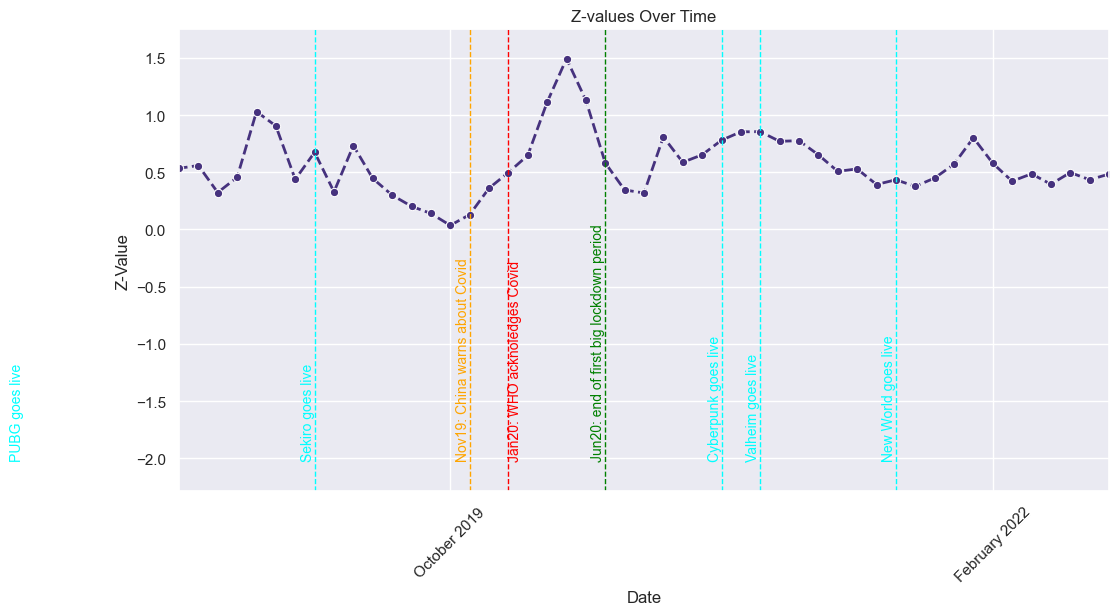

In [102]:


## Data Visualization 

# Set theme and palette
sns.set_theme(style="darkgrid")
sns.set_palette("viridis")

# Create a line plot for Total values over Date
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.lineplot(data=out7[1:], x=out7.index[1:], y='Z', marker='o', linestyle='--', linewidth=2)

#### Add a vertical line on a specific date

# Covid related lines
plt.axvline(x="November 2019", color='orange', linestyle='--', linewidth=1)
plt.axvline(x="January 2020", color='red', linestyle='--', linewidth=1)
plt.axvline(x="June 2020", color='green', linestyle='--', linewidth=1)

plt.text(x="November 2019", y=-2,  s='Nov19: China warns about Covid', color='orange', fontsize=10, ha='right', rotation=90)
plt.text(x="January 2020", y=-2, s='Jan20: WHO acknoledges Covid', color='red', fontsize=10, ha='left', rotation=90)
plt.text(x="June 2020", y=-2, s='Jun20: end of first big lockdown period', color='green', fontsize=10, ha='right', rotation=90)

# Game related lines
plt.axvline(x="December 2017", color='cyan', linestyle='--', linewidth=1)
plt.axvline(x="December 2020", color='cyan', linestyle='--', linewidth=1)
plt.axvline(x="September 2021", color='cyan', linestyle='--', linewidth=1)
plt.axvline(x="February 2021", color='cyan', linestyle='--', linewidth=1)
plt.axvline(x="March 2019", color='cyan', linestyle='--', linewidth=1)


plt.text(x="December 2017", y=-2, s="PUBG goes live", color='cyan', fontsize=10, ha='right', rotation=90)
plt.text(x="December 2020", y=-2, s="Cyberpunk goes live", color='cyan', fontsize=10, ha='right', rotation=90)
plt.text(x="September 2021", y=-2, s="New World goes live", color='cyan', fontsize=10, ha='right', rotation=90)
plt.text(x="February 2021", y=-2, s="Valheim goes live", color='cyan', fontsize=10, ha='right', rotation=90)
plt.text(x="March 2019", y=-2, s="Sekiro goes live", color='cyan', fontsize=10, ha='right', rotation=90)

### Graphic formatting

# Format the date on the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#Limit x-axis onto a specific interval 
plt.xlim('August 2022', 'August 2018')  # Specify the limits as strings
plt.gca().invert_xaxis() # inverts the x-axis (more suited for dates as it grows from left to right)

# Set titles and labels
plt.title('Z-values Over Time')
plt.xlabel('Date')
plt.ylabel('Z-Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability